# <center> AB Fresh Supply Co. Ltd.</center>

## Company Introduction : Abalone Producing and Processing Company
They want to supply the highest quality of abalones with a good price through direct transactions with fish farms.<br>
They have experience in exporting abalones to North America as well as South East Asia.<br>
To find the highest quality abalones, they need to analyze their measurements.<br>
One of the key measurements in this process is the age of the abalone.<br>


### Current Scenario : 
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.

<b>By adding 1.5 to the number of rings, we get the abalone’s age in years.</b>

## Problem Statement :

The current process suffers from the following problems:<br>

Since the <b><i>age</i></b> of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.
This becomes a quite boring and time-consuming task.

# Data Description

<table>	<th>	Column Name	</th>	<th>	Description	</th>	
<tr>	<td>	ID	</td>	<td>	Unique Id of the sample.	</td>	</tr>
<tr>	<td>	Sex	</td>	<td>	The sex of the abalone (M, F, and I (infant)).	</td>	</tr>
<tr>	<td>	Length	</td>	<td>	Longest shell measurement (mm).	</td>	</tr>
<tr>	<td>	Diameter	</td>	<td>	Diameter of abalone perpendicular to length (mm).	</td>	</tr>
<tr>	<td>	Height	</td>	<td>	Height of abalone with meat in the shell (mm).	</td>	</tr>
<tr>	<td>	Whole_weight	</td>	<td>	Weight of the whole abalone (grams).	</td>	</tr>
<tr>	<td>	Shucked_weight	</td>	<td>	Weight of the meat of abalone (grams).	</td>	</tr>
<tr>	<td>	Viscera_weight	</td>	<td>	Gut weight (after bleeding) of the abalone (grams).	</td>	</tr>
<tr>	<td>	Shell_weight	</td>	<td>	Weight of the abalone after being dried (grams).	</td>	</tr>
<tr>	<td>	Rings	</td>	<td>	Number of Rings in the abalone.	</td>	</tr>
</table>							


In [5]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
train_data = pd.read_csv('abalone_train.csv')

In [7]:
train_data.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,883,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,3627,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,2106,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


In [8]:
train_data.tail()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
3336,1033,M,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770,10
3337,3264,F,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,12
3338,1653,M,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535,10
3339,2607,F,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185,9
3340,2732,I,0.410,0.325,0.110,0.3260,0.1325,0.0750,0.1010,8


In [9]:
train_data.shape

(3341, 10)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3341 non-null   int64  
 1   Sex             3341 non-null   object 
 2   Length          3341 non-null   float64
 3   Diameter        3341 non-null   float64
 4   Height          3341 non-null   float64
 5   Whole_weight    3341 non-null   float64
 6   Shucked_weight  3341 non-null   float64
 7   Viscera_weight  3341 non-null   float64
 8   Shell_weight    3341 non-null   float64
 9   Rings           3341 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 261.1+ KB


In [12]:
train_data.describe()

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,2085.442083,0.525887,0.409463,0.140129,0.838176,0.363600,0.182507,0.241385,9.958396
std,1197.721846,0.119759,0.098895,0.042623,0.493789,0.224156,0.110439,0.139828,3.205591
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1055.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.093500,0.132000,8.000000
50%,2086.000000,0.545000,0.425000,0.145000,0.810000,0.341500,0.172500,0.235000,10.000000
75%,3114.000000,0.620000,0.485000,0.165000,1.168500,0.509500,0.255500,0.330000,11.000000
max,4175.000000,0.815000,0.650000,1.130000,2.779500,1.488000,0.760000,1.005000,27.000000


In [107]:
test_data = pd.read_csv('abalone_test.csv')

In [14]:
test_data.shape

(836, 9)

# Train Data Profiling

In [22]:
from pandas_profiling import profile_report

In [23]:
#PR = train_data.profile_report(title='Abalone_Age_Profile')

In [24]:
#PR.to_file('Abalone_Profile_Report')

# Dataset Information

Number of variables	- 10<br>
Number of observations	- 3341<br>
Missing cells	- 0<br>

#### Variable types

Numeric	- 9<br>
Categorical	- 1

1) Id -  Unique Id of each entry<br>
2) Sex - Categorical - Male, Female and Infant. Almost Equally Distributed 37% , 32% and 31.5%<br>
3) Length - Range -  0.74, Max at 0.81<br>
4) Diameter - Range - 0.59, Max at 0.65<br>
5) Height - Range - 1.13, Max at 1.13<br>
6) Whole Weight -  Range - 2.775, Max at 2.795<br>
7) Shucked Weight - Range - 1.487, Max at 1.488<br>
8) Viscera Weight -  Range - 0.75, Max at 0.76 <br>
9) Shell Weight -  Range - 1.0395, Max at 1.005 <br>
10) <b> <i> Rings </i></b> - Target Variable. Almost normally distributed. Range - 26 . Maximum - 27. Mean - 9.95

## Data Preprocessing

<AxesSubplot:>

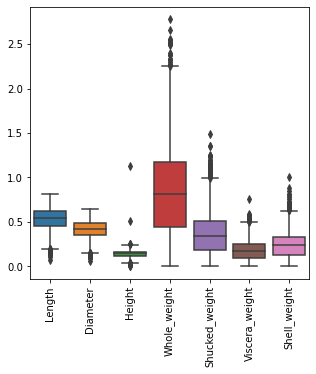

In [65]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.boxplot(data=train_data.drop(['Id','Rings'],axis=1))

## Data Preprocessing

## Outlier Removal

In [62]:
def remove_outlier(df_in, col_name):
    Q1 = df_in[col_name].quantile(0.25)# Calculate quantile 1 using quantile(0.25)
    Q3 = df_in[col_name].quantile(0.75)# Calculate quantile 3
    IQR = Q3-Q1# Calculate IQR as difference of Quantile 3 and quantile 
    LowerBound = Q1-1.5*IQR# Find the lower bound
    UpperBound = Q3+1.5*IQR# Find the upper bound as quantile3 + 1.5*IQR
    df_out = df_in.loc[(df_in[col_name] >= LowerBound) & (df_in[col_name] <= UpperBound)]    # Remove the values lying outside min and upper bound range
    return df_out  


In [66]:
train_data1 = train_data.copy()

In [67]:
train_data1.columns

Index(['Id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [68]:
## Outlier Removal
# 1 - length
def log(train_data1):
    df_out = remove_outlier(train_data1,'Length')
    return df_out
train_data1 = log(train_data1) 

#2 - Diameter
def log(train_data1):
    df_out = remove_outlier(train_data1,'Diameter')
    return df_out
train_data1 = log(train_data1) 

#3 - Height
def log(train_data1):
    df_out = remove_outlier(train_data1,'Height')
    return df_out
train_data1 = log(train_data1) 

#4 - Whole Wieght
def log(train_data1):
    df_out = remove_outlier(train_data1,'Whole_weight')
    return df_out
train_data1 = log(train_data1) 

#5 - Shucked_weight
def log(train_data1):
    df_out = remove_outlier(train_data1,'Shucked_weight')
    return df_out
train_data1 = log(train_data1)

#6 - Viscera_weight
def log(train_data1):
    df_out = remove_outlier(train_data1,'Viscera_weight')
    return df_out
train_data1 = log(train_data1)

#7 - Shell_weight
def log(train_data1):
    df_out = remove_outlier(train_data1,'Shell_weight')
    return df_out
train_data1 = log(train_data1)




In [71]:
train_data1.shape

(3220, 10)

## Exploratory Data Analysis 

#### Q1 - What is the distribution of Rings in the datasource?

<AxesSubplot:xlabel='Rings', ylabel='Density'>

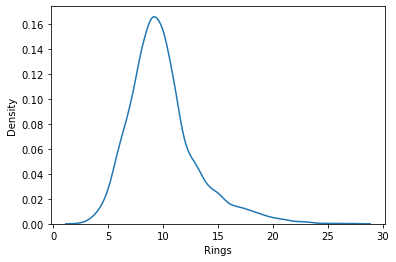

In [74]:
sns.kdeplot(train_data1['Rings'])

<b>Insights :</b> Data is Normally Distributed

#### Q2 - What is the distribution of Sex?

<AxesSubplot:xlabel='Sex', ylabel='count'>

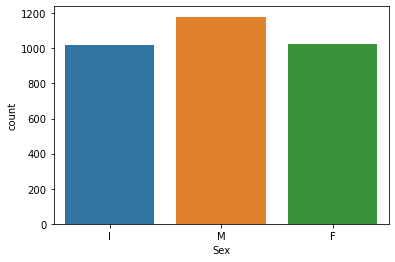

In [75]:
sns.countplot(train_data1['Sex'])

#### Q3 - What is the Distribution of major continous variables with respect to Sex

<AxesSubplot:title={'center':'Rings'}, xlabel='Sex', ylabel='Shell_weight'>

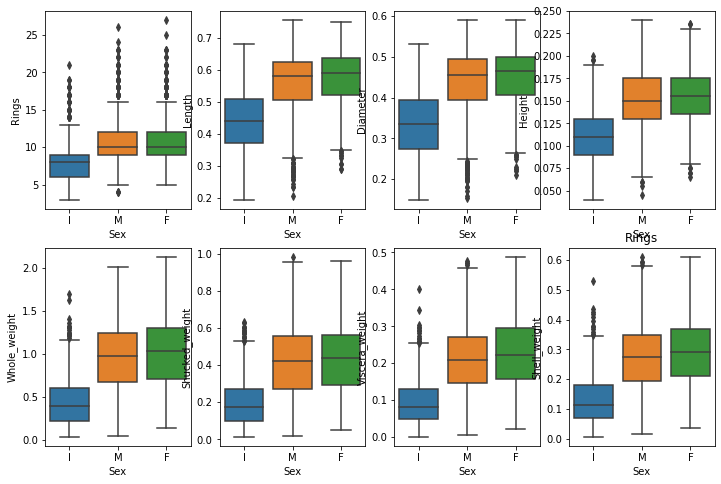

In [76]:
f,axes = plt.subplots(2,4, figsize=(12,8))
plt.title('Rings')
sns.boxplot(data=train_data1, x='Sex', y='Rings',ax=axes[0,0]);
sns.boxplot(data=train_data1, x='Sex', y='Length',ax=axes[0,1])
sns.boxplot(data=train_data1, x='Sex', y='Diameter',ax=axes[0,2])
sns.boxplot(data=train_data1, x='Sex', y='Height',ax=axes[0,3])
sns.boxplot(data=train_data1, x='Sex', y='Whole_weight',ax=axes[1,0])
sns.boxplot(data=train_data1, x='Sex', y='Shucked_weight',ax=axes[1,1])
sns.boxplot(data=train_data1, x='Sex', y='Viscera_weight',ax=axes[1,2])
sns.boxplot(data=train_data1, x='Sex', y='Shell_weight',ax=axes[1,3])

#### Insights :  
1) Ring Size of Infant is smaller compared to Male and Female where Ring Size is close to 10. Female and Male have almost same Ring Size<br>
2) Length of Female is slightly higher compared to Male and Infant<br>
3) Whole Weight of Fish is higher of Female compared to Male and Infant<br>
4) Shell Weight of Fish in female is higher as compared to Male and Infant <br>


### Q4 -  What is the relationship between the continous variable

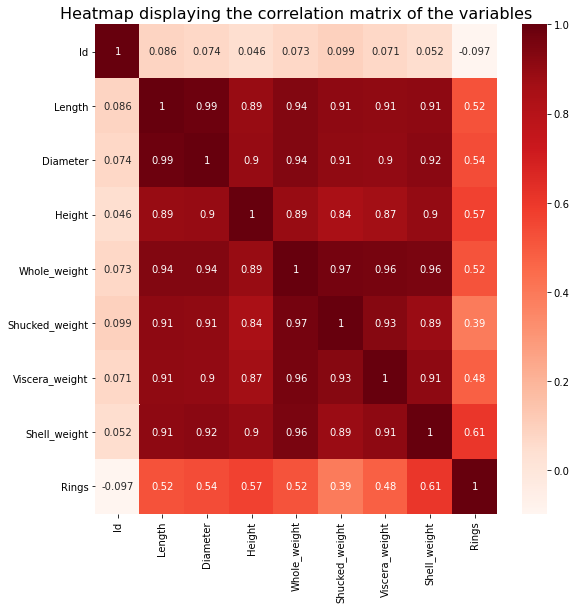

In [79]:
plt.figure(figsize=(9,9))
sns.heatmap(train_data1.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

### Insights : Rings have high coorelation with Shell Weight whereas least Coorelation with Sucket_weight. Data has high multicollinearity

# Converting Categorical Variable Sex to Numerical Variable

In [80]:
train_data1 = pd.get_dummies(train_data1,drop_first=True)

In [83]:
train_data2 = train_data1.drop('Id',axis=1)

## Splitting the Variable and Scaling the Variable

In [88]:
X= train_data2.drop('Rings',axis=1)
y = train_data2['Rings']
print(X.shape,y.shape)

(3220, 9) (3220,)


In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
SS = StandardScaler()

In [93]:
X[X.columns] = SS.fit_transform(X)

In [94]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,3220.0,-6.051060e-16,1.000155,-2.962435,-0.675239,0.176853,0.771075,2.060426
Diameter,3220.0,1.492250e-16,1.000155,-2.797724,-0.635907,0.174775,0.769275,1.958274
Height,3220.0,-1.781529e-16,1.000155,-2.767431,-0.678102,0.018341,0.714784,2.804113
Whole_weight,3220.0,-1.144012e-16,1.000155,-1.731546,-0.819687,-0.029632,0.728999,2.918128
Shucked_weight,3220.0,-7.999122e-17,1.000155,-1.674654,-0.809269,-0.080525,0.714693,3.091730
Viscera_weight,3220.0,2.921748e-16,1.000155,-1.740369,-0.819658,-0.070357,0.688740,3.029695
Shell_weight,3220.0,2.724529e-16,1.000155,-1.802615,-0.801234,-0.000918,0.689995,2.955914
Sex_I,3220.0,1.836350e-16,1.000155,-0.679443,-0.679443,-0.679443,1.471793,1.471793
Sex_M,3220.0,-1.406742e-17,1.000155,-0.760547,-0.760547,-0.760547,1.314844,1.314844


# Linear Regression Builtup

In [95]:
LinReg = LinearRegression()

In [96]:
LinReg.fit(X,y)

LinearRegression()

In [98]:
PredValues = LinReg.predict(X)

In [99]:
mse = mean_squared_error(y,PredValues)

In [102]:
rmse = np.sqrt(mean_squared_error(y,PredValues))

In [103]:
rmse

2.14520713856295

# Working on Test Data

In [112]:
test_data1 = test_data.copy()

In [113]:
test_data1.drop('Id',axis=1,inplace=True)

In [114]:
test_data1 = pd.get_dummies(test_data1,drop_first=True) # Conversion of Categorical Variable to Numerical Variable

In [115]:
test_data1[test_data1.columns] = SS.transform(test_data1) # Transforming the Data using Standard Scaler

In [116]:
test_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,836.0,-0.079515,1.087056,-3.455752,-0.720086,0.087159,0.759864,2.194967
Diameter,836.0,-0.078579,1.085439,-3.284132,-0.689952,0.120729,0.715229,2.282546
Height,836.0,-0.063299,1.070002,-3.324585,-0.817390,0.018341,0.714784,2.804113
Whole_weight,836.0,-0.055122,1.056703,-1.782715,-0.852502,-0.100267,0.626384,4.470986
Shucked_weight,836.0,-0.054910,1.045156,-1.716507,-0.865279,-0.164232,0.582977,3.904181
Viscera_weight,836.0,-0.051271,1.037980,-1.715882,-0.849043,-0.165856,0.631195,4.538093
Shell_weight,836.0,-0.051199,1.074553,-1.814442,-0.899795,-0.119192,0.629873,5.218876
Sex_I,836.0,0.069372,1.025384,-0.679443,-0.679443,-0.679443,1.471793,1.471793
Sex_M,836.0,-0.025720,0.993107,-0.760547,-0.760547,-0.760547,1.314844,1.314844


In [120]:
PredValues1 = pd.DataFrame(LinReg.predict(test_data1))

In [123]:
Output = pd.DataFrame(test_data['Id'])

In [125]:
Output['Rings'] = PredValues1

In [126]:
Output.shape

(836, 2)

In [129]:
Output.tail()

,Id,Rings
831,575,10.476827
832,3231,9.270938
833,1084,8.080290
834,290,12.613271
835,2713,5.795873


In [130]:
Output.to_csv('submission.csv', index=False, header=False)